<a href="https://colab.research.google.com/github/hufsaim/T03108701/blob/main/notebook_2025/Lab04_DTI_eigenvector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nibabel

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

## Data load

In [3]:
h = nib.load('tensors.nii.gz')
meas = h.get_fdata()
print(meas.shape)

(73, 98, 66, 1, 6)


In [4]:
Dxx = np.rot90(meas[:,:,:,0,0])
Dxy = np.rot90(meas[:,:,:,0,1])
Dyy = np.rot90(meas[:,:,:,0,2])
Dxz = np.rot90(meas[:,:,:,0,3])
Dyz = np.rot90(meas[:,:,:,0,4])
Dzz = np.rot90(meas[:,:,:,0,5])

print(Dxx.shape, Dyy.shape)

(98, 73, 66) (98, 73, 66)


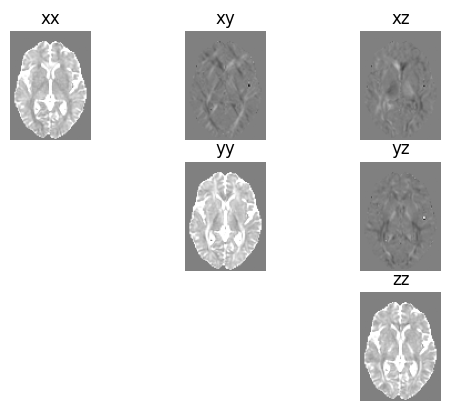

In [5]:
zi = 23

plt.subplot(331)
plt.imshow(Dxx[:,:,zi],vmin=-1500,vmax=1500,cmap='gray')
plt.axis('off')
plt.title('xx')

plt.subplot(332)
plt.imshow(Dxy[:,:,zi],vmin=-1500,vmax=1500,cmap='gray')
plt.axis('off')
plt.title('xy')

plt.subplot(333)
plt.imshow(Dxz[:,:,zi],vmin=-1500,vmax=1500,cmap='gray')
plt.axis('off')
plt.title('xz')

plt.subplot(335)
plt.imshow(Dyy[:,:,zi],vmin=-1500,vmax=1500,cmap='gray')
plt.axis('off')
plt.title('yy')

plt.subplot(336)
plt.imshow(Dyz[:,:,zi],vmin=-1500,vmax=1500,cmap='gray')
plt.axis('off')
plt.title('yz')

plt.subplot(339)
plt.imshow(Dzz[:,:,zi],vmin=-1500,vmax=1500,cmap='gray')
plt.axis('off')
plt.title('zz')

plt.show()

## WM fiber bundle visualiztion using eigenvector

In [6]:
# Matrix definition in a single voxel
zi=24
xi=61
yi=52

D = np.array([[Dxx[xi,yi,zi],Dxy[xi,yi,zi],Dxz[xi,yi,zi]],
              [Dxy[xi,yi,zi],Dyy[xi,yi,zi],Dyz[xi,yi,zi]],
              [Dxz[xi,yi,zi],Dyz[xi,yi,zi],Dzz[xi,yi,zi]]])
print(D)

[[ 553.57910156   81.96170044 -169.85282898]
 [  81.96170044 1198.78430176 -381.90982056]
 [-169.85282898 -381.90982056  611.86083984]]


In [7]:
# calculate eigenvalues and eigenvectors
eigvals, eigvecs = np.linalg.eig(D)
print(eigvals)
print(eigvecs)

[1413.06426767  601.376782    349.78319349]
[[-0.17298811 -0.82677213  0.53527839]
 [-0.87433654  0.37911237  0.30300069]
 [ 0.45344318  0.41559794  0.78845903]]


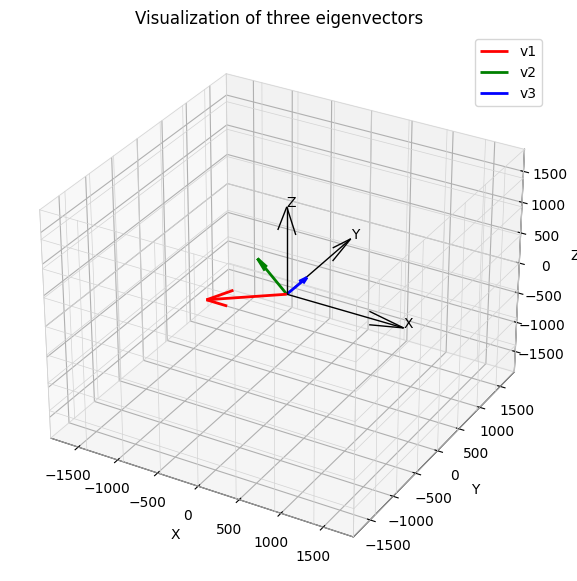

In [8]:
# visualize three eigenvectors
import matplotlib.pyplot as plt

v1 = eigvals[0]*eigvecs[:,0]
v2 = eigvals[1]*eigvecs[:,1]
v3 = eigvals[2]*eigvecs[:,2]

vectors = [v1, v2, v3]
colors = ['r', 'g', 'b']
labels = ['v1', 'v2', 'v3']

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

origin = np.zeros(3)

for v, c, lab in zip(vectors, colors, labels):
    ax.quiver(
        origin[0], origin[1], origin[2],
        v[0], v[1], v[2],
        color=c, label=lab, linewidth=2
    )

axis_len = np.max(eigvals)
ax.quiver(0, 0, 0, axis_len, 0, 0, color='k', linewidth=1)
ax.text(axis_len, 0, 0, 'X', color='k')

ax.quiver(0, 0, 0, 0, axis_len, 0, color='k', linewidth=1)
ax.text(0, axis_len, 0, 'Y', color='k')

ax.quiver(0, 0, 0, 0, 0, axis_len, color='k', linewidth=1)
ax.text(0, 0, axis_len, 'Z', color='k')

all_vals = np.array(vectors)
max_range = 1.5*np.max(np.abs(all_vals))
ax.set_xlim([-max_range, max_range])
ax.set_ylim([-max_range, max_range])
ax.set_zlim([-max_range, max_range])

grid_step = max_range / 4
xs = ys = zs = np.arange(-max_range, max_range + grid_step, grid_step)

for z in zs:
    ax.plot(xs, [ys[0]]*len(xs), [z]*len(xs), color='lightgray', linewidth=0.5)
    ax.plot(xs, [ys[-1]]*len(xs), [z]*len(xs), color='lightgray', linewidth=0.5)
    ax.plot([xs[0]]*len(ys), ys, [z]*len(ys), color='lightgray', linewidth=0.5)
    ax.plot([xs[-1]]*len(ys), ys, [z]*len(ys), color='lightgray', linewidth=0.5)

for x in xs:
    ax.plot([x]*len(zs), [ys[0]]*len(zs), zs, color='lightgray', linewidth=0.5)
    ax.plot([x]*len(zs), [ys[-1]]*len(zs), zs, color='lightgray', linewidth=0.5)

for y in ys:
    ax.plot([xs[0]]*len(zs), [y]*len(zs), zs, color='lightgray', linewidth=0.5)
    ax.plot([xs[-1]]*len(zs), [y]*len(zs), zs, color='lightgray', linewidth=0.5)


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.legend()
plt.title("Visualization of three eigenvectors")
plt.show()

In [9]:
# inner product of eigenvectors: orthogonality
print(np.dot(eigvecs[:,0],eigvecs[:,1]))
print(np.dot(eigvecs[:,0],eigvecs[:,2]))
print(np.dot(eigvecs[:,1],eigvecs[:,2]))

8.326672684688674e-17
3.885780586188048e-16
-3.885780586188048e-16


In [10]:
# length of eigenvector: orthonormal basis
print(np.linalg.norm(eigvecs[:,0]))
print(np.linalg.norm(eigvecs[:,1]))
print(np.linalg.norm(eigvecs[:,2]))

1.0
1.0
1.0


In [11]:
# Sort eigenvalues
p1 = eigvecs[:,np.argsort(eigvals)[2]]
p2 = eigvecs[:,np.argsort(eigvals)[1]]
p3 = eigvecs[:,np.argsort(eigvals)[0]]

print(p1,p2,p3)

[-0.17298811 -0.87433654  0.45344318] [-0.82677213  0.37911237  0.41559794] [0.53527839 0.30300069 0.78845903]


In [12]:
# QΛQ^T = D
np.dot(np.dot(eigvecs,np.diag(eigvals)),eigvecs.transpose())

array([[ 553.57910156,   81.96170044, -169.85282898],
       [  81.96170044, 1198.78430176, -381.90982056],
       [-169.85282898, -381.90982056,  611.86083984]])

In [13]:
# calculate color-coded fractional anisotropy map
eigmap = np.zeros((Dxx.shape[0],Dxx.shape[1],Dxx.shape[2],3))
eigvec = np.zeros((Dxx.shape[0],Dxx.shape[1],Dxx.shape[2],3))
famap = np.zeros((Dxx.shape[0],Dxx.shape[1],Dxx.shape[2]))
zi = 24
for xi in range(Dxx.shape[0]):
    for yi in range(Dxx.shape[1]):
        D = np.array([[Dxx[xi,yi,zi],Dxy[xi,yi,zi],Dxz[xi,yi,zi]],
                      [Dxy[xi,yi,zi],Dyy[xi,yi,zi],Dyz[xi,yi,zi]],
                      [Dxz[xi,yi,zi],Dyz[xi,yi,zi],Dzz[xi,yi,zi]]])
        eigvals, eigvecs = np.linalg.eig(D)
        eigmap[xi,yi,zi,0] = eigvals[np.argsort(eigvals)[2]]
        eigmap[xi,yi,zi,1] = eigvals[np.argsort(eigvals)[1]]
        eigmap[xi,yi,zi,2] = eigvals[np.argsort(eigvals)[0]]
        famap[xi,yi,zi] = np.sqrt((eigvals[0]-eigvals[1])**2+(eigvals[0]-eigvals[2])**2+(eigvals[1]-eigvals[2])**2)/np.sqrt(2*(eigvals[0]**2+eigvals[1]**2+eigvals[2]**2))
        eigvec[xi,yi,zi,:] = (famap[xi,yi,zi])*np.abs(eigvecs[:,np.argsort(eigvals)[2]])

/tmp/ipython-input-3017966352.py:15: RuntimeWarning: invalid value encountered in scalar divide
  famap[xi,yi,zi] = np.sqrt((eigvals[0]-eigvals[1])**2+(eigvals[0]-eigvals[2])**2+(eigvals[1]-eigvals[2])**2)/np.sqrt(2*(eigvals[0]**2+eigvals[1]**2+eigvals[2]**2))


red: left/right, green: anterior/posterior, blue: superior/inferior


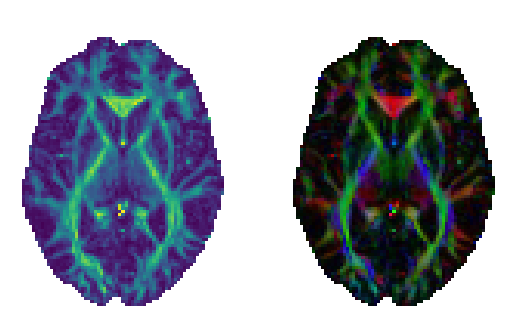

In [15]:
print(f'red: left/right, green: anterior/posterior, blue: superior/inferior')
plt.subplot(121)
plt.imshow(famap[:,:,zi])
plt.axis('off')
plt.subplot(122)
plt.imshow(eigvec[:,:,zi,:])
plt.axis('off')
plt.show()